### 목표
- 붓꽃의 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 특징을 활용해 3가지 품종을 분류해보자
- knn모델의 이웃의 숫자를 조저해보자(하이퍼파라미터 튜닝)

In [2]:
# 사이킷런에서 제공하는 데이터 세트를 생성하기
from sklearn.datasets import load_iris
iris_data = load_iris() # Bunch class (딕셔너리와 유사함)
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# iris_data의 키값 확인
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# DESCR 키에서는 데이터셋에 대한 설명
# petal : 꽃잎 / sepal : 꽃받침
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# target_names : 예측하고자 하는 iris 품종의 이름을 문자열 배열로 가지고있음
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# feature_names : 각 특성을 설명하는 문자열
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# 꽃잎의 길이, 너비, 꽃밭침의 깊이, 너비
# data 키값

iris_data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
# 답 데이터
# target 키값
# 0 -> setosa, 1 -> versicolor, 2 -> virginica
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 데이터셋 구성하기
- 문제와 답 분리
- 훈련세트와 평가세트 분리
    - 훈련세트/훈련데이터/train : 머신러닝 모델을 학습할 때 사용
    - 평가세토/평가데이터/홀드아웃 세트 : 모델이 얼마나 잘 작동하는지 측정하는데 사용

In [12]:
import pandas as pd

In [15]:
# 문제데이터 생성 -> 데이터프레임 형태
# data 키값을 활용해서 데이터프레임 생성
# columns 값은 feature_names 활용

iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
# 문제와 답 데이터로 분리
# 문제 데이터--> X / 답데이터--> y

X = iris_df
y = iris_data['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [110]:
from sklearn.model_selection import train_test_split

# 훈련세트와 평가세트로 분리하기
# train_test_split 함수 -> 훈련세트와 테스트세트를 분리해주는 기능
# 데이터를 나누기 전에 데이터셋을 무작위로 섞어준다.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)
# random_state : 함수를 여러번 실행해도 결과가 똑같이 나온다.



In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


### EDA (데이터 살펴보기)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

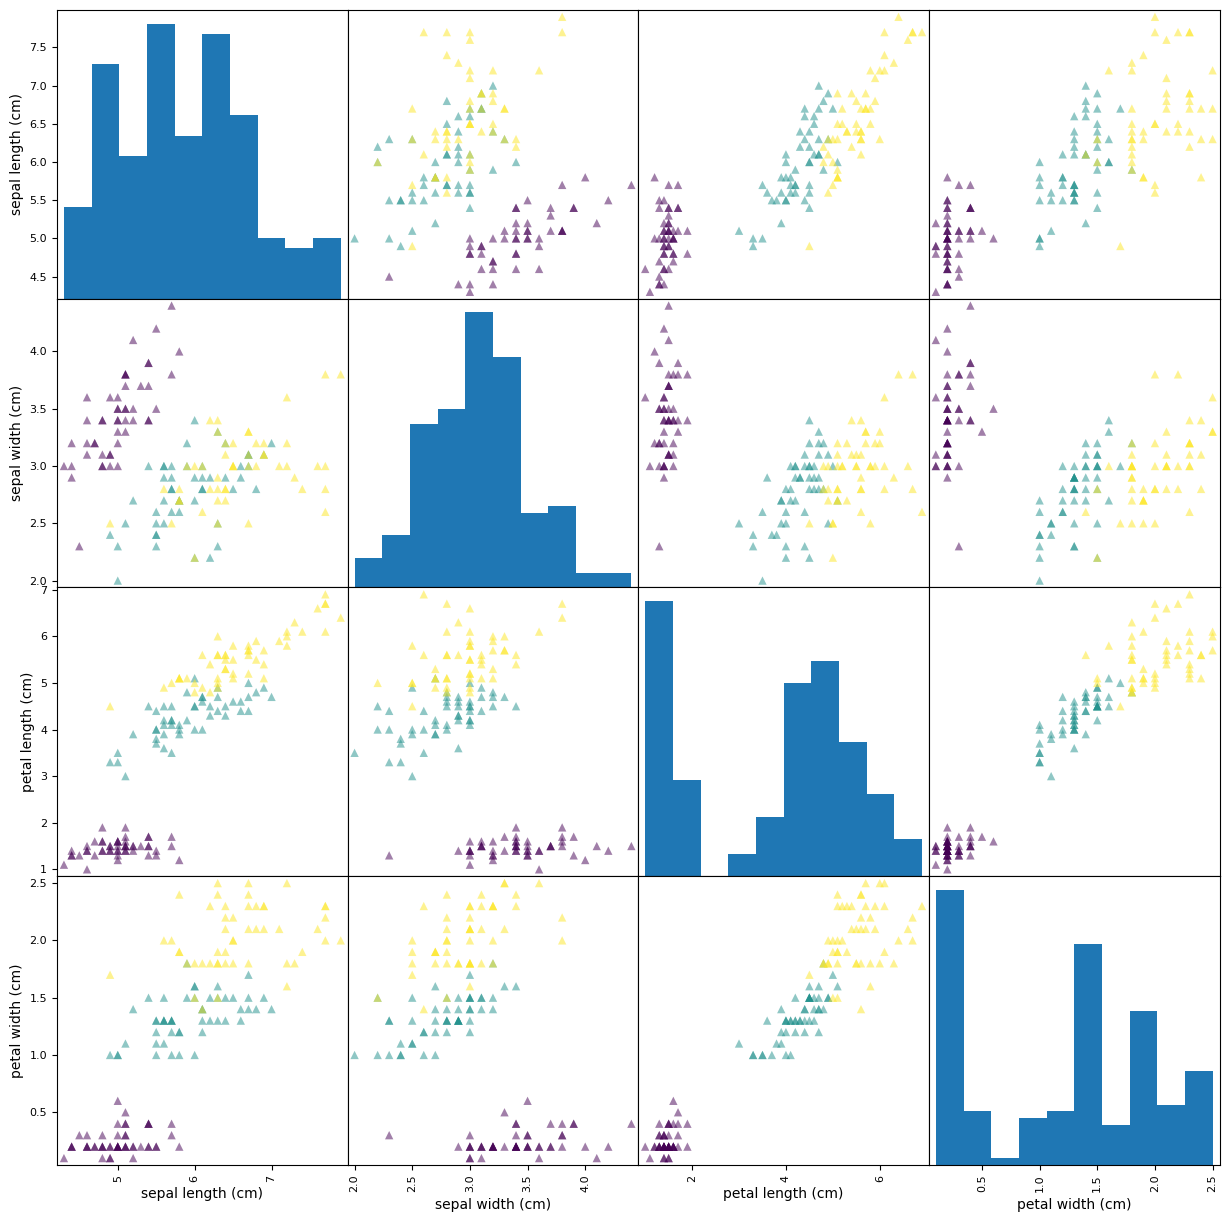

In [26]:
# pd.plotting.scatter_matrix 함수 : 데이터프레임 산점도 행렬 생성
pd.plotting.scatter_matrix(iris_df,
                           figsize=(15,15), # figsize --> 행렬의 크기
                           marker = '^', # 그래프의 점 모양
                           c = y,  #산점도 그래프의 점 색상/ y는 클래스 레이블
                           alpha = 0.5)  # alpha는 점의 투명도 1로갈수록 불투명

- 세 클래스가 꽃잎과 꽃받침의 측정값에 따라 비교적 잘 구분됨
- 머신러닝모델을 학습시키는데에 적합하다고 판단됨

## 모델링

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [111]:
# 모델 생성 모델이름 호출
knn = KNeighborsClassifier(n_neighbors=6)

In [112]:
# 모델 학습
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [113]:
# 예측하기
pre = knn.predict(X_test)
pre

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0])

In [114]:
metrics.accuracy_score(pre, y_test)

1.0

## 하이퍼파라미터 튜닝

In [138]:
test_list = []
train_list = []

for k in range(1,105) : 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_pre = knn.predict(X_test)
    test_result = metrics.accuracy_score(test_pre, y_test)
    test_list.append(test_result)
    
    train_pre = knn.predict(X_train)
    train_result = metrics.accuracy_score(train_pre, y_train)
    train_list.append(train_result)

print(test_list)
print(train_list)
# print(train_list)
#test_list.shape

[0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.93

In [139]:
# 훈련/테스트 결과 시각화
import matplotlib.pyplot as plt

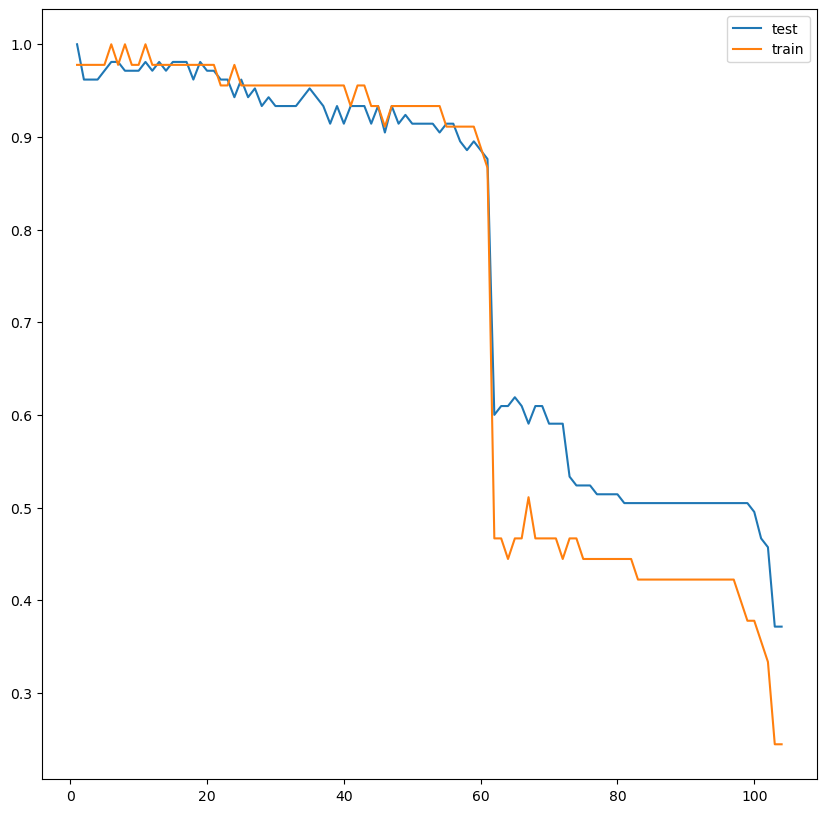

In [148]:
# 예측 데이터
plt.figure(figsize = (10,10))
plt.plot(range(1,105), train_list) # label 값 달아주기

# 테스트 데이터
plt.plot(range(1,105), test_list) # label 값 달아주기
# 범례 표시
plt.legend(['test','train'])